---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Merging Dataframes


In [43]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon [hello}', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Name,Item Purchased,Cost
Store 1,Chris,Sponge,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Filip,Spoon [hello},5.0


In [44]:
df = df['Item Purchased'].str.replace(r" \[.*\}","")
df

Store 1          Sponge
Store 1    Kitty Litter
Store 2           Spoon
Name: Item Purchased, dtype: object

In [ ]:
df.set_index([pd.Index([1,2,3])])

In [ ]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

In [ ]:
df['Delivered'] = True
df

In [ ]:
df['Feedback'] = ['Positive', None, 'Negative']
df

In [ ]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

In [ ]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

In [ ]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

In [ ]:
pd.merge(staff_df, student_df, how='outer', left_index=True,right_index=True)

In [ ]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

In [ ]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

In [ ]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

In [ ]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

In [ ]:
pd.merge(staff_df, student_df, how='inner',left_on='Name',right_on='Name')

In [ ]:
staff_df

In [ ]:
student_df

In [ ]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

In [ ]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
print(staff_df)
print()
print(student_df)
print()
print(pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name']))

# Idiomatic Pandas: Making Code Pandorable

In [ ]:
import pandas as pd
df = pd.read_csv('census.csv')
df

In [ ]:
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

In [ ]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

In [ ]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [ ]:
df.apply(min_max, axis=1)

In [ ]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

In [ ]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

# Group by

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df

In [ ]:
%%timeit -n 10
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

In [365]:
np.average(df.where(df['STNAME']=='Alabama').dropna()['CENSUS2010POP'])

71339.34328358209

In [ ]:
np.average(df[df['STNAME']=='Alabama']['CENSUS2010POP'])

In [ ]:
df['STNAME'].unique()

In [372]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
# df.loc[:,['SUMLEV']]
filt = df["SUMLEV"]==40
df.loc[filt,'STNAME']

0                    Alabama
68                    Alaska
98                   Arizona
114                 Arkansas
190               California
249                 Colorado
314              Connecticut
323                 Delaware
327     District of Columbia
329                  Florida
397                  Georgia
557                   Hawaii
563                    Idaho
608                 Illinois
711                  Indiana
804                     Iowa
904                   Kansas
1010                Kentucky
1131               Louisiana
1196                   Maine
1213                Maryland
1238           Massachusetts
1253                Michigan
1337               Minnesota
1425             Mississippi
1508                Missouri
1624                 Montana
1681                Nebraska
1775                  Nevada
1793           New Hampshire
1804              New Jersey
1826              New Mexico
1860                New York
1923          North Carolina
2024          

In [374]:
df[df['STNAME']=='Alabama']

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,50,3,6,1,125,Alabama,Tuscaloosa County,194656,194653,194977,...,3.983504,4.256278,5.261075,4.787490,1.884402,5.306232,5.202679,6.333332,6.057539,3.158710
64,50,3,6,1,127,Alabama,Walker County,67023,67023,67004,...,-4.579296,-4.336533,-0.666096,-3.300481,-3.087245,-4.085450,-3.869753,-0.181663,-2.692097,-2.460626
65,50,3,6,1,129,Alabama,Washington County,17581,17583,17610,...,-14.708407,-13.062030,-11.181733,1.067236,-0.950486,-13.849940,-12.075121,-10.122411,2.193763,0.118811
66,50,3,6,1,131,Alabama,Wilcox County,11670,11665,11557,...,-7.029724,-10.239356,-12.314507,-13.835235,0.090453,-7.029724,-10.239356,-12.314507,-13.835235,0.090453


In [ ]:
a = df.groupby('STNAME')
for i in a:
    print(i)

In [377]:
%%timeit -n 10
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

tate Oregon have an average population of 207085.0810810811
Counties in state Pennsylvania have an average population of 373599.3823529412
Counties in state Rhode Island have an average population of 350855.6666666667
Counties in state South Carolina have an average population of 196824.0
Counties in state South Dakota have an average population of 24303.880597014926
Counties in state Tennessee have an average population of 132210.52083333334
Counties in state Texas have an average population of 197220.0862745098
Counties in state Utah have an average population of 184259.0
Counties in state Vermont have an average population of 83432.13333333333
Counties in state Virginia have an average population of 119371.83582089552
Counties in state Washington have an average population of 336227.0
Counties in state West Virginia have an average population of 66178.35714285714
Counties in state Wisconsin have an average population of 155807.83561643836
Counties in state Wyoming have an average po

In [ ]:
df.head()

In [380]:
df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')


There are 1196 records in group 0 for processing.
There are 1154 records in group 1 for processing.
There are 843 records in group 2 for processing.


In [382]:
for group,fname in df.groupby(fun):
    print(group)
    # print(len(fname))

0
1
2


In [384]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [386]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [388]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.SeriesGroupBy'>


In [390]:
a = (df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg(['mean','sum']))
a.rename(columns={'mean':'Mean','sum':'Sum'},inplace=True)
a

,Mean,Sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956
Colorado,78581.187500,5029196
Connecticut,446762.125000,3574097
Delaware,299311.333333,897934
District of Columbia,601723.000000,601723


In [392]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011'].agg(['mean','sum']))

POPESTIMATE2010           POPESTIMATE2011          
                                mean       sum            mean       sum
STNAME                                                                  
Alabama                 71420.313433   4785161    71658.328358   4801108
Alaska                  24621.413793    714021    24921.379310    722720
Arizona                427213.866667   6408208   431248.800000   6468732
Arkansas                38965.253333   2922394    39180.506667   2938538
California             643691.017241  37334079   650000.586207  37700034
Colorado                78878.968750   5048254    79991.875000   5119480
Connecticut            447464.625000   3579717   448719.875000   3589759
Delaware               299930.333333    899791   302638.666667    907916
District of Columbia   605126.000000    605126   620472.000000    620472
Florida                281341.641791  18849890   285157.208955  19105533
Georgia                 61090.905660   9713454    61712.452830   9812280
Hawaii                 272796.000000   1363980   275645.400000   1378227
Idaho                   35704.227273   1570986    36003.045455   1584134
Illinois               125894.598039  12841249   126096.882353  12861882
Indiana                 70549.891304   6490590    70835.271739   6516845
Iowa                    30815.090909   3050694    30963.525253   3065389
Kansas                  27226.895238   2858824    27332.542857   2869917
Kentucky                36232.808333   4347937    36399.016667   4367882
Louisiana               71014.859375   4544951    71490.328125   4575381
Maine                   82980.937500   1327695    83016.062500   1328257
Maryland               241183.708333   5788409   243507.125000   5844171
Massachusetts          468931.142857   6565036   472271.214286   6611797
Michigan               119004.445783   9877369   118995.048193   9876589
Minnesota               61044.862069   5310903    61472.632184   5348119
Mississippi             36223.365854   2970316    36317.060976   2977999
Missouri                52139.582609   5996052    52265.973913   6010587
Montana                 17690.053571    990643    17816.892857    997746
Nebraska                19677.688172   1830025    19810.569892   1842383
Nevada                 159025.882353   2703440   159930.529412   2718819
New Hampshire          131670.800000   1316708   131834.400000   1318344
New Jersey             419232.428571   8803881   421092.095238   8842934
New Mexico              62567.909091   2064741    62976.545455   2078226
New York               312950.322581  19402920   314890.354839  19523202
North Carolina          95589.790000   9558979    96510.250000   9651025
North Dakota            12726.981132    674530    12930.679245    685326
Ohio                   131145.068182  11540766   131198.204545  11545442
Oklahoma                48825.922078   3759596    49176.961039   3786626
Oregon                 106610.333333   3837972   107458.583333   3868509
Pennsylvania           189731.552239  12712014   190226.895522  12745202
Rhode Island           210643.800000   1053219   210371.200000   1051856
South Carolina         100780.304348   4635894   101581.152174   4672733
South Dakota            12368.166667    816299    12489.227273    824289
Tennessee               66911.421053   6356585    67351.663158   6398408
Texas                   99387.255906  25244363   101001.826772  25654464
Utah                    95704.344828   2775426    97118.620690   2816440
Vermont                 44713.142857    625984    44763.357143    626687
Virginia                60344.263158   8025787    60983.330827   8110783
Washington             172898.974359   6743060   174954.589744   6823229
West Virginia           33713.181818   1854225    33726.327273   1854948
Wisconsin               79030.611111   5690204    79301.666667   5709720
Wyoming                 24544.173913    564516    24685.565217    567768

In [394]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2010']).agg({'avg':np.average,'sum':np.sum})

SpecificationError: Column(s) ['avg', 'sum'] do not exist

In [397]:
b = (df.set_index('STNAME').groupby(level=0).agg({'POPESTIMATE2010': [np.average, np.sum], 'POPESTIMATE2010': [np.average, np.sum]}))
b.rename(columns={'average':'Average'})

POPESTIMATE2010          
                             Average       sum
STNAME                                        
Alabama                 71420.313433   4785161
Alaska                  24621.413793    714021
Arizona                427213.866667   6408208
Arkansas                38965.253333   2922394
California             643691.017241  37334079
Colorado                78878.968750   5048254
Connecticut            447464.625000   3579717
Delaware               299930.333333    899791
District of Columbia   605126.000000    605126
Florida                281341.641791  18849890
Georgia                 61090.905660   9713454
Hawaii                 272796.000000   1363980
Idaho                   35704.227273   1570986
Illinois               125894.598039  12841249
Indiana                 70549.891304   6490590
Iowa                    30815.090909   3050694
Kansas                  27226.895238   2858824
Kentucky                36232.808333   4347937
Louisiana               71014.859375   4544951
Maine                   82980.937500   1327695
Maryland               241183.708333   5788409
Massachusetts          468931.142857   6565036
Michigan               119004.445783   9877369
Minnesota               61044.862069   5310903
Mississippi             36223.365854   2970316
Missouri                52139.582609   5996052
Montana                 17690.053571    990643
Nebraska                19677.688172   1830025
Nevada                 159025.882353   2703440
New Hampshire          131670.800000   1316708
New Jersey             419232.428571   8803881
New Mexico              62567.909091   2064741
New York               312950.322581  19402920
North Carolina          95589.790000   9558979
North Dakota            12726.981132    674530
Ohio                   131145.068182  11540766
Oklahoma                48825.922078   3759596
Oregon                 106610.333333   3837972
Pennsylvania           189731.552239  12712014
Rhode Island           210643.800000   1053219
South Carolina         100780.304348   4635894
South Dakota            12368.166667    816299
Tennessee               66911.421053   6356585
Texas                   99387.255906  25244363
Utah                    95704.344828   2775426
Vermont                 44713.142857    625984
Virginia                60344.263158   8025787
Washington             172898.974359   6743060
West Virginia           33713.181818   1854225
Wisconsin               79030.611111   5690204
Wyoming                 24544.173913    564516

# Scales

In [399]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [401]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): ['A', 'A+', 'A-', 'B', ..., 'C+', 'C-', 'D', 'D+']

In [403]:
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head()

TypeError: astype() got an unexpected keyword argument 'categories'

In [406]:
grades > 'C'

NameError: name 'grades' is not defined

In [408]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})
pd.cut(df['avg'],10)

SpecificationError: nested renamer is not supported

# Pivot Tables

In [409]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('cars.csv')

In [410]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [411]:
pd.pivot_table(df,values='(km)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,100.0,117.0,NaN,NaN
2013,NaN,NaN,122.0,NaN,100.0,117.0,109.0,352.750000
2014,NaN,131.0,122.0,NaN,100.0,135.0,109.0,395.666667
2015,130.0,131.0,122.0,149.0,100.0,135.0,109.0,394.333333
2016,130.0,131.0,122.0,149.0,100.0,153.5,109.0,409.000000


In [412]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35

# Date Functionality in Pandas

In [413]:
import pandas as pd
import numpy as np

### Timestamp

In [414]:
pd.Timestamp('3-May-2016 10:5 AM')

Timestamp('2016-05-03 10:05:00')

### Period

In [415]:
pd.Period('6/2016')

Period('2016-06', 'M')

In [416]:
pd.Period('5-5-2016')

Period('2016-05-05', 'D')

### DatetimeIndex

In [417]:
t1 = pd.Series( [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')],list('abc'))
t1 = pd.DataFrame(t1)
t1

,0
a,2016-09-01
b,2016-09-02
c,2016-09-03


In [418]:
type(t1.index)

pandas.core.indexes.base.Index

### PeriodIndex

In [419]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [420]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

### Converting to Datetime

In [396]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,3)), index=d1, columns=list('abc'))
ts3

,a,b,c
2 June 2013,54,36,21
"Aug 29, 2014",64,83,84
2015-06-26,69,86,81
7/12/16,85,41,95


In [398]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b,c
2013-06-02,54,36,21
2014-08-29,64,83,84
2015-06-26,69,86,81
2016-07-12,85,41,95


In [400]:
pd.to_datetime('4.7.12',dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [402]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [ ]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

### Working with Dates in a Dataframe

In [422]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [425]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,102,125
2016-10-16,104,119
2016-10-30,113,115
2016-11-13,109,123
2016-11-27,112,123
2016-12-11,121,124
2016-12-25,128,124
2017-01-08,137,119
2017-01-22,140,129


In [426]:
df.index.weekday_name

AttributeError: 'DatetimeIndex' object has no attribute 'weekday_name'

In [427]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,2.0,-6.0
2016-10-30,9.0,-4.0
2016-11-13,-4.0,8.0
2016-11-27,3.0,0.0
2016-12-11,9.0,1.0
2016-12-25,7.0,0.0
2017-01-08,9.0,-5.0
2017-01-22,3.0,10.0


In [428]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,106.333333,119.666667
2016-11-30,110.500000,123.000000
2016-12-31,124.500000,124.000000
2017-01-31,138.500000,124.000000


In [429]:
df['2017']

,Count 1,Count 2
2017-01-08,137,119
2017-01-22,140,129


In [430]:
df['2016-12']

,Count 1,Count 2
2016-12-11,121,124
2016-12-25,128,124


In [431]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,121,124
2016-12-25,128,124
2017-01-08,137,119
2017-01-22,140,129


In [432]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,102,125
2016-10-09,102,125
2016-10-16,104,119
2016-10-23,104,119
2016-10-30,113,115
2016-11-06,113,115
2016-11-13,109,123
2016-11-20,109,123
2016-11-27,112,123
2016-12-04,112,123


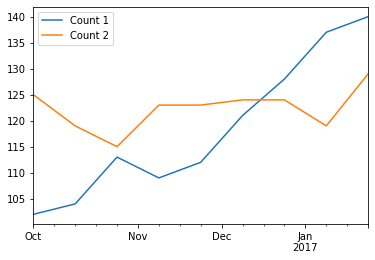

In [434]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()